# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
## Aprendizaje No Supervisado

## Edición 2024

#### Entregable Único
#### GRUPO N° 30

Integrantes:

Fernando Camino

Emanuel Nicolás Herrador

Juana Rapoport

Sebastián Stutz

Juan Ignacio Szurlewicz

# Consignas

Utilizar la base de jugadores “female_players.csv” disponible en la página de Kaggle https://www.kaggle.com/datasets/stefanoleone992/fifa-23-complete-player-dataset . Consideren que en comparación con la base vista en clase, esta base no tiene los mismos jugadores (ahora mujeres 2023) y no tiene exactamente el mismo formato (a los nombres de las variables se les agregó una keyword para identificar a qué tipo de habilidad corresponde).

Con la nueva base, realizar el siguiente análisis. Notar que es más completo pero análogo al que realizamos con los datos FIFA2019 en el cursado de la materia. Realice comentarios en cada parte (verbose=True ;))

1- Análisis exploratorio inicial de la base.


2- Evaluación visual e intuitiva de a dos variables numéricas por vez. Sugerencia: hagan los scatterplots de las combinaciones de dos variables que tengan algún sentido para ustedes, porque todas las combinaciones de variables son muchas y no van a poder analizarlas como merecen.


3- Pregunta: ¿Se realizó alguna normalización o escalado de la base? ¿Por qué ?


4- Aplicación de clustering para encontrar grupos de jugadoras con habilidades equivalentes, por ejemplo, jugadoras que podrían intercambiarse en el caso de una lesión o cuando una jugadora está cansada. Para esto utilice como mínimo dos técnicas de clustering: por ejemplo k-medias, DBSCAN, mezcla de Gaussianas y/o alguna jerárquica. Justifiquen por qué eligen los diferentes hiper-parámetros que se puedan elegir según el método: número de clusters, medida de distancia, criterio de aglomeración…


5- Análisis cualitativo de los clusters encontrados. ¿Qué hay en cada cluster? ¿Son efectivamente equivalentes las jugadoras de un cluster, es decir, podrían cumplir el mismo rol en un equipo? Si se trata de clusters heterogéneos, ¿por qué razón pueden haber sido agrupadas las jugadoras del cluster? ¿Qué motiva las diferencias en tamaño?


6- Uso de alguna transformación (proyección, Embedding) para visualizar los resultados y/o usarla como preprocesado para aplicar alguna técnica de clustering.



#Librerias

In [ ]:
#Manipulación
import pandas as pd
import numpy as np
import itertools
import warnings
warnings.filterwarnings("ignore")
import time

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

#Algoritmos
from sklearn.cluster import KMeans
from sklearn import (manifold, preprocessing, decomposition)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


# Configuramos los límites de visualización de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



# Resolución

##Análisis Exploratorio

En primer lugar, vamos a realizar la lectura de nuestra base de datos y una rápida visualización de los datos mediante **_df.head()**

In [ ]:
_df=pd.read_csv("female_players.csv")
_df.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89

Como parte del anpalisis exploratorio de la base, realizamos una exploración de los formatos de las columnas

In [ ]:
_columns_types = _df.dtypes.reset_index()
_columns_types['orden'] = _columns_types.index
_columns_types = _columns_types.pivot(index=['orden','index'],columns=0, values=0)
_columns_types.fillna('').reset_index().drop(columns={'orden'})


,index,int64,float64,object
0,player_id,int64,,
1,player_url,,,object
2,fifa_version,int64,,
3,fifa_update,int64,,
4,fifa_update_date,,,object
5,short_name,,,object
6,long_name,,,object
7,player_positions,,,object
8,overall,int64,,
9,potential,int64,,


Podemos observar como un primer punto, que existe un campo que indica la versión del FIFA bajo análisis, por ende para el presente trabajo seleccionaremos solamente un año de estudio. A su vez, existe el campo de "fifa update", lo cuál sugiere que cada jugadora podría estar más de una vez en el dataset debido a una actualización en su rendimiento. Chequeamos esa existencia de duplicados y nos quedaremos con la última actualización.

In [ ]:
_version = _df['fifa_version'].unique()
_updates = _df['fifa_update'].unique()
print(f"Versiones de FIFA que componen la muestra:{_version}")
print(f"Actualizaciones de FIFA que componen la muestra:{_updates}")


Versiones de FIFA que componen la muestra:[23 22 21 20 19 18 17 16]
Actualizaciones de FIFA que componen la muestra:[ 9  8  7  6  5  4  3  2  1 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55
 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31
 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 75 74 73
 72 71 70 84 83 82 81 80 79 78 77 76 99 98 97 96 95 94 93 92 91 90 89 88
 87 86 85]


Filtramos el Dataframe y nos quedamos sólo con la versión 23 del FIFA

In [ ]:
_df_23 = _df.copy()
_df_23 = _df_23[_df_23['fifa_version']==23]

In [ ]:
_duplicates = len(_df_23['player_id'].unique())
_tamaño_df = len(_df_23)
print(f"Existen un total de {_duplicates} valores únicos(jugadoras), sobre un total de {_tamaño_df} registros")

Existen un total de 899 valores únicos(jugadoras), sobre un total de 7425 registros


Como vemos, los valores no son únicos, por ende nos vamos a quedar con el último update de cada jugadora.

In [ ]:
_df_23 = _df_23.sort_values(by=['player_id','fifa_update'],ascending=False)
_df_23 = _df_23.drop_duplicates(subset=['player_id'],keep='first')
_df_23.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
754,273050,/player/273050/sofie-lundgaard/230009,23,9,2023-01-13,S. Lundgaard,Sofie Lundgaard,CM,68,85,3200000.0,500.0,20,2002-05-29,172,63,2216.0,Women's Super League,1.0,116343.0,Liverpool W,SUB,15.0,NaN,2023-01-10,2024.0,13,Denmark,NaN,NaN,NaN,Right,3,3,1,Medium/Medium,Lean (170-185),No,9000000.0,NaN,NaN,71.0,66.0,59.0,69.0,57.0,61.0,35,72,46,69,56,69,30,52,64,72,70,71,70,69,65,59,52,65,61,64,60,58,70,69,54,59.0,56,64,49,11,9,9,13,6,NaN,66+2,66+2,66+2,67,69,69,69,67,69+2,69+2,69+2,66+2,68+2,68+2,68+2,66+2,60+2,63+2,63+2,63+2,60+2,59+2,59+2,59+2,59+2,59+2,16+2,https://cdn.sofifa.net/players/273/050/23_120.png
702,273010,/player/273010/kathrine-kuhl/230009,23,9,2023-01-13,K. Kühl,Kathrine Kühl,CM,70,90,4400000.0,500.0,18,2003-07-05,172,60,2216.0,Women's Super League,1.0,116009.0,Arsenal W,SUB,22.0,NaN,2023-01-07,2024.0,13,Denmark,NaN,NaN,NaN,Right,3,3,1,Medium/Medium,Lean (170-185),No,13600000.0,NaN,Flair,69.0,54.0,64.0,72.0,61.0,65.0,35,46,43,78,68,76,41,56,74,75,69,69,62,60,59,59,57,62,67,58,67,59,70,69,61,61.0,63,68,60,6,7,15,14,11,NaN,62+2,62+2,62+2,65,67,67,67,65,70+2,70+2,70+2,66+2,70+2,70+2,70+2,66+2,62+2,68+2,68+2,68+2,62+2,62+2,63+2,63+2,63+2,62+2,15+2,https://cdn.sofifa.net/players/273/010/23_120.png
654,272937,/player/272937/dejana-stefanovic/230009,23,9,2023-01-13,D. Stefanović,Dejana Stefanović,CDM,71,77,2700000.0,500.0,24,1997-07-05,171,66,2216.0,Women's Super League,1.0,116013.0,Brighton & Hove Albion W,SUB,6.0,NaN,2023-01-06,2024.0,51,Serbia,NaN,NaN,NaN,Right,5,3,1,Medium/Medium,Normal (170-185),No,6200000.0,NaN,Playmaker (AI),65.0,48.0,65.0,64.0,71.0,75.0,45,41,74,75,37,63,58,74,69,67,65,65,59,66,62,38,60,67,79,70,77,71,59,62,61,71.0,70,71,69,13,14,8,12,10,NaN,59+2,59+2,59+2,61,61,61,61,61,64+2,64+2,64+2,62+2,67+2,67+2,67+2,62+2,66+2,70+2,70+2,70+2,66+2,67+2,72+2,72+2,72+2,67+2,18+2,https://cdn.sofifa.net/players/272/937/23_120.png
807,272546,/player/272546/reanna-blades/230009,23,9,2023-01-13,R. Blades,Reanna Blades,"RW, RWB",63,84,1500000.0,500.0,17,2004-10-02,165,58,2216.0,Women's Super League,1.0,116010.0,Chelsea W,RES,2.0,NaN,2022-10-13,2024.0,14,England,NaN,NaN,NaN,Right,3,3,1,Medium/Medium,Normal (170-),No,4600000.0,NaN,Speed Dribbler (AI),83.0,52.0,57.0,67.0,35.0,61.0,56,53,33,65,48,68,43,41,56,65,83,83,75,50,75,52,64,56,63,51,63,37,58,53,41,59.0,31,39,31,14,12,14,7,8,NaN,57+2,57+2,57+2,63,61,61,61,63,62+2,62+2,62+2,63+2,57+2,57+2,57+2,63+2,52+2,50+2,50+2,50+2,52+2,49+2,45+2,45+2,45+2,49+2,15+2,https://cdn.sofifa.net/players/272/546/23_120.png
831,272541,/player/272541/lulu-jarvis/230009,23,9,2023-01-13,L. Jarvis,Lulu Jarvis,CM,57,78,

luego, eliminamos columnas que ya sabemos que no utilizaremos, dado que no son de interés para la pregunta que vamos a intentar responder.

In [ ]:
_df_23.drop(columns={'fifa_version','fifa_update','player_face_url','fifa_update_date','player_url','long_name','wage_eur','dob','club_jersey_number',
                     'club_loaned_from','nationality_name','nation_team_id','nation_position','nation_jersey_number','real_face','release_clause_eur','player_tags','player_traits',
                     'league_id','league_name','league_level','club_team_id','club_name','club_position','club_joined_date','club_contract_valid_until_year','nationality_id'},inplace=True)

In [ ]:
_df_23.head(3)

,player_id,short_name,player_positions,overall,potential,value_eur,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
754,273050,S. Lundgaard,CM,68,85,3200000.0,20,172,63,Right,3,3,1,Medium/Medium,Lean (170-185),71.0,66.0,59.0,69.0,57.0,61.0,35,72,46,69,56,69,30,52,64,72,70,71,70,69,65,59,52,65,61,64,60,58,70,69,54,59.0,56,64,49,11,9,9,13,6,NaN,66+2,66+2,66+2,67,69,69,69,67,69+2,69+2,69+2,66+2,68+2,68+2,68+2,66+2,60+2,63+2,63+2,63+2,60+2,59+2,59+2,59+2,59+2,59+2,16+2
702,273010,K. Kühl,CM,70,90,4400000.0,18,172,60,Right,3,3,1,Medium/Medium,Lean (170-185),69.0,54.0,64.0,72.0,61.0,65.0,35,46,43,78,68,76,41,56,74,75,69,69,62,60,59,59,57,62,67,58,67,59,70,69,61,61.0,63,68,60,6,7,15,14,11,NaN,62+2,62+2,62+2,65,67,67,67,65,70+2,70+2,70+2,66+2,70+2,70+2,70+2,66+2,62+2,68+2,68+2,68+2,62+2,62+2,63+2,63+2,63+2,62+2,15+2
654,272937,D. Stefanović,CDM,71,77,2700000.0,24,171,66,Right,5,3,1,Medium/Medium,Normal (170-185),65.0,48.0,65.0,64.0,71.0,75.0,45,41,74,75,37,63,58,74,69,67,65,65,59,66,62,38,60,67,79,70,77,71,59,62,61,71.0,70,71,69,13,14,8,12,10,NaN,59+2,59+2,59+2,61,61,61,61,61,64+2,64+2,64+2,62+2,67+2,67+2,67+2,62+2,66+2,70+2,70+2,70+2,66+2,67+2,72+2,72+2,72+2,67+2,18+2


Ahora analizamos las distintas posiciones de juego de las jugadoras del dataset y así poder avanzar en el análisis. Entender esas posiciones será clave al momento de analizar las variables y la relacion entre ellas así como tambien, analizar los cluster que se comformen.

In [ ]:
_positions = _df_23['player_positions'].unique()
_positions

array(['CM', 'CDM', 'RW, RWB', 'GK', 'RM, CAM', 'LB', 'CAM, LM', 'CB',
       'CAM, RM, CM', 'CAM, CM, CF', 'RB', 'CDM, CM', 'ST', 'LB, CDM',
       'RW, LW, ST', 'LW, ST, RW', 'CM, RM, LM', 'RB, LB', 'LW, RW', 'RW',
       'LB, RB', 'LM, RM, ST', 'RW, LW, RWB', 'CB, RB', 'ST, CAM',
       'ST, LM', 'LM, CAM', 'LWB, CB, LB', 'CAM, ST', 'LW, RW, ST',
       'LW, LB', 'RM, RWB', 'ST, LW', 'LM, LB', 'LB, LWB', 'LB, CB, LWB',
       'RM, LM', 'ST, RM', 'CM, CAM', 'CM, CDM', 'CAM', 'LWB, CB',
       'CDM, CB', 'CAM, CM', 'RW, RM', 'ST, RW', 'CB, CDM', 'RB, CB',
       'CF, ST, CAM', 'LM', 'LWB, RWB', 'CDM, RM', 'RM, LB, RB', 'CM, ST',
       'RWB, RB', 'LM, ST', 'LW', 'LM, ST, CM', 'RM, ST', 'LW, ST, CAM',
       'RB, RM, LB', 'LM, CAM, CM', 'CDM, RB', 'RB, RM', 'CB, CM',
       'RW, ST', 'RW, LM', 'ST, LW, CAM', 'LM, CM', 'CM, CB', 'LWB',
       'RB, CM', 'CB, LWB', 'LB, LWB, LW', 'CB, RWB, RB', 'LWB, LB',
       'CB, LB', 'ST, CAM, LM', 'CDM, CB, CM', 'CM, CAM, ST', 'RW, LB',
       'CM, 

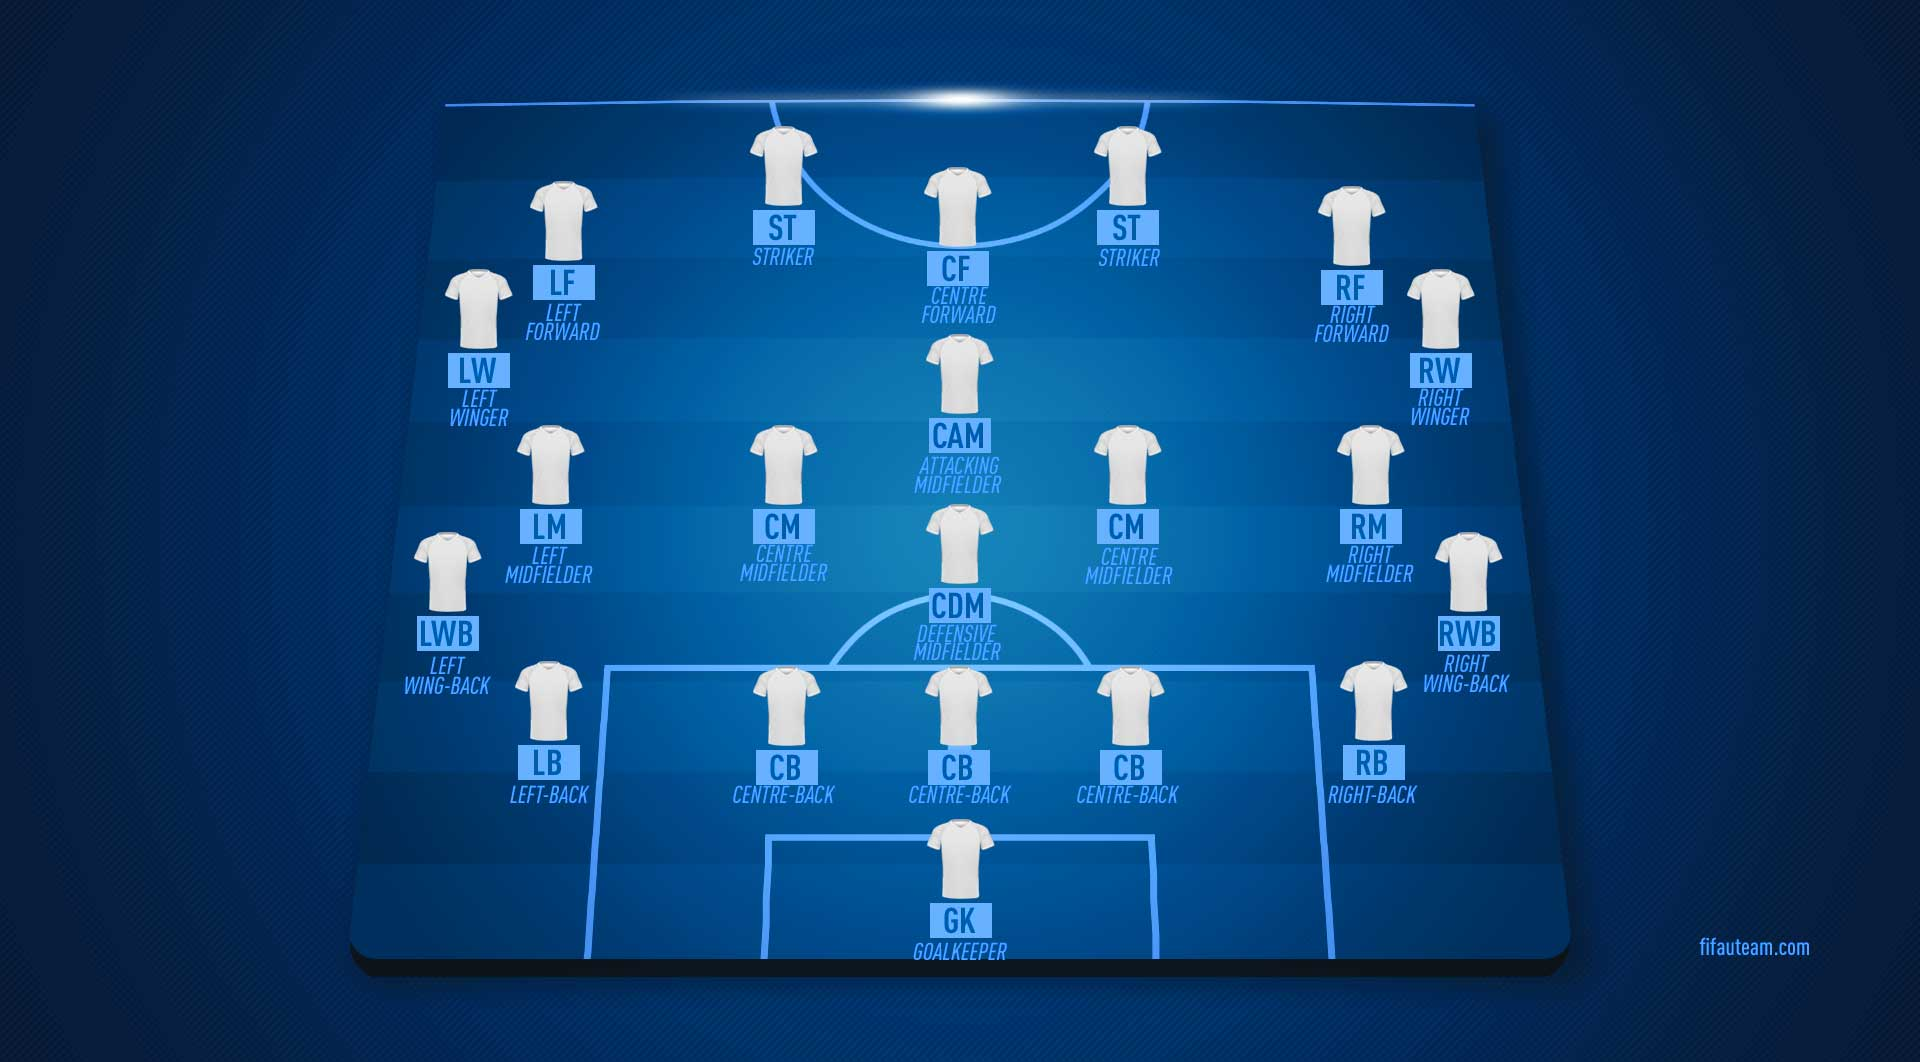

Para facilitar el análisis, vamos a mapear las abreviaturas con el nombre de la posición, utilzando de forma más general las 4 posiciones más utilizadas: Arquero, Defensor, Mediocampista y Delantero.

In [ ]:
# Mapeo de categorías generales
position_mapping = {
    'GK': 'Arquero',
    'CB': 'Defensor', 'RB': 'Defensor', 'LB': 'Defensor', 'CDM': 'Defensor', 'LWB': 'Defensor', 'RWB': 'Defensor',
    'CM': 'Mediocampista', 'CDM': 'Mediocampista', 'CAM': 'Mediocampista', 'RM': 'Mediocampista', 'LM': 'Mediocampista',
    'RW': 'Delantero', 'LW': 'Delantero', 'ST': 'Delantero', 'CF': 'Delantero','LF': 'Delantero', 'RF': 'Delantero'
}

# Función para mapear posiciones
def map_position(pos):
    positions = pos.split(', ')
    mapped_positions = set()
    for p in positions:
        if p in position_mapping:
            mapped_positions.add(position_mapping[p])
        else:
            # Si hay una posición no mapeada, considerarla como "Otro"
            mapped_positions.add('Otro')
    return ', '.join(sorted(mapped_positions))

# Aplicamos al dataframe
_df_23['General_Position'] = _df_23['player_positions'].apply(map_position)

Podemos ver en la siguiente salida, que algunas jugadoras no tienen una posición única o "pura" por decirlo de alguna forma, y por el contrario, tienen una doble posición.

In [ ]:
_df_23['General_Position'].unique()

array(['Mediocampista', 'Defensor, Delantero', 'Arquero', 'Defensor',
       'Delantero, Mediocampista', 'Delantero', 'Defensor, Mediocampista',
       'Defensor, Delantero, Mediocampista'], dtype=object)

Por último,para poder utilizar las variables que indican el desempeño de los jugadores en las distintas posiciones, vamos a realizar una transformación de las mismas, sumando los valores separados por un "+". Estas variables van desde el 1 al 99 y contienen valores más allá de la posición real que cada jugadora tenga.

In [ ]:
# Iteramos sobre las columnas
for column in _df_23.iloc[:, 56:-1].columns:
    def sum_if_possible(value):
        try:
            # Dividimos el valor utilizando el simbolo '+'
            parts = value.split('+')
            if len(parts) == 2:
                return int(parts[0]) + int(parts[1])
        except:
            pass

        try:
            # Dividimos el valor utilizando el simbolo '-'
            parts = value.split('-')
            if len(parts) == 2:
                return int(parts[0]) - int(parts[1])
        except:
            pass

        # Si ningún caso aplica, devolvemos el valor original
        return value

    # Aplicamos la función a cada elemento de la columna
    _df_23[column] = _df_23[column].apply(sum_if_possible)


In [ ]:
print(_df_23.iloc[:, 56:-1].head())
for column in _df_23.iloc[:, 56:-1].columns:
  _df_23[column] = _df_23[column].astype(int)

     ls  st  rs  lw  lf  cf  rf  rw lam cam ram  lm lcm  cm rcm  rm lwb ldm  \
754  68  68  68  67  69  69  69  67  71  71  71  68  70  70  70  68  62  65   
702  64  64  64  65  67  67  67  65  72  72  72  68  72  72  72  68  64  70   
654  61  61  61  61  61  61  61  61  66  66  66  64  69  69  69  64  68  72   
807  59  59  59  63  61  61  61  63  64  64  64  65  59  59  59  65  54  52   
831  55  55  55  57  56  56  56  57  60  60  60  59  59  59  59  59  56  56   

    cdm rdm rwb  lb lcb  cb rcb  rb  gk  
754  65  65  62  61  61  61  61  61  18  
702  70  70  64  64  65  65  65  64  17  
654  72  72  68  69  74  74  74  69  20  
807  52  52  54  51  47  47  47  51  17  
831  56  56  56  56  53  53  53  56  17  


## Exploración Visual

Para realizar la exploración visual, en primer lugar, vamos a observar la escala de nuestras variables de interés, para considerar si hace falta escalarlas o no. Para ello, podemos analizar las medidas descriptivas de cada una de las columnas.

En caso de utilizar variables como **value_eur** y **height_cm**, deberiamos escalar por tener otra escala de magnitudes, sin embargo, el resto de las variables se encuentra comprendidas entre el 0 y el 100, por ende no sería necesario ya que ninguna de ella tendria más peso sobre otra por cuestiones de escala.

In [ ]:
_df_23.describe()

,player_id,overall,potential,value_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
count,899.000000,899.000000,899.000000,5.760000e+02,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.00000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,110.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,255470.816463,74.912125,79.526140,1.515777e+07,25.408231,168.744160,60.885428,3.100111,2.638487,1.434928,71.262357,60.662864,66.740177,70.808619,59.552598,67.030418,55.977753,53.974416,56.664071,68.705228,47.927697,62.440489,54.501669,49.389321,60.879867,67.506118,66.72970,67.543938,64.879867,71.923248,67.865406,63.133482,66.345940,65.878754,65.709677,53.749722,57.431591,53.496107,57.180200,60.939933,53.575083,65.135706,52.955506,55.034483,51.369299,18.157953,18.058954,18.001112,18.048943,18.398220,37.990909,63.351502,63.351502,63.351502,62.720801,62.895439,62.895439,62.895439,62.720801,65.378198,65.378198,65.378198,65.443826,65.153504,65.153504,65.153504,65.443826,62.844271,62.870968,62.870968,62.870968,62.844271,61.965517,60.175751,60.175751,60.175751,61.965517,26.180200
std,15339.361788,6.412687,5.701379,2.231581e+07,4.513427,6.127556,5.322265,0.634029,0.911146,0.887267,10.316237,14.904958,8.827286,8.818683,18.096648,8.434675,20.601845,23.145334,20.768920,17.293770,20.904393,21.269759,19.441270,18.054043,16.773050,19.680486,15.19309,14.942094,14.227668,8.242409,13.235435,12.546305,11.354258,16.168854,12.533840,22.155672,18.148562,24.344062,23.968772,15.255973,17.088975,12.917135,24.006361,24.172817,23.731455,20.912043,20.370015,20.157978,20.793605,21.425882,6.930183,15.763951,15.763951,15.763951,16.868115,16.402990,16.402990,16.402990,16.868115,16.066933,16.066933,16.066933,16.129829,15.261741,15.261741,15.261741,16.129829,15.983016,16.129454,16.129454,16.129454,15.983016,16.308958,17.136821,17.136821,17.136821,16.308958,18.258012
min,226177.000000,57.000000,63.000000,3.500000e+05,17.000000,151.000000,46.000000,1.000000,1.000000,1.000000,33.000000,24.000000,38.000000,42.000000,18.000000,36.000000,5.000000,5.000000,6.000000,14.000000,4.000000,8.000000,8.000000,10.000000,15.000000,9.000000,22.00000,16.000000,21.000000,45.000000,30.000000,13.000000,15.000000,16.000000,30.000000,5.000000,12.000000,6.000000,4.000000,13.000000,10.000000,11.000000,5.000000,8.000000,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,21.000000,22.000000,22.000000,22.000000,19.000000,21.000000,21.000000,21.000000,19.000000,22.000000,22.000000,22.000000,22.000000,23.000

A continuación, vamos a realizar un análisis de correlacion de forma visual, mediante scatterplots, considerando pares de variables de interés por las cualidades de las mismas. Además podemos evaluar ciertas intuciones que nos servirán a la hora de plantear las técnicas de clustering

Cómo punto a destacar, excluimos del análisis a los arqueros, dado que es una posición facilmente separable por las técnicas de clustering dado que no poseen las habilidades de todos los otros jugadores y además, no serán objeto de estudio en nuestro análisis ya que buscaremos jugadores de campo que sean reemplazables entre sí.

In [ ]:
_df_23_no_gk = _df_23.copy()
_df_23_no_gk = _df_23_no_gk[_df_23_no_gk['General_Position'] != 'Arquero']

In [ ]:
#Pairplots Function
def pairplot_variables(df,columns,figsize,Legend):
    hue_parameter='General_Position'
    columns.append(hue_parameter)
    data = df[columns]
    # Creamos una figura
    plt.figure(figsize=figsize)

    # Creamos el pairplot
    g = sns.pairplot(data=data, hue=hue_parameter)
    # Ajustamos el tamaño de la figura
    g.fig.set_size_inches(figsize)
    if Legend==False:
      g._legend.remove()

**1.   Attacking Finishing vs Defending:** al ser una variable puramente de ataque, principalmente para atacantes o delanteros vs una variable de defensa, esperamos ver una relación negativa entre dichas variables y una buena separación de las posiciones de juego.

<Figure size 1000x600 with 0 Axes>

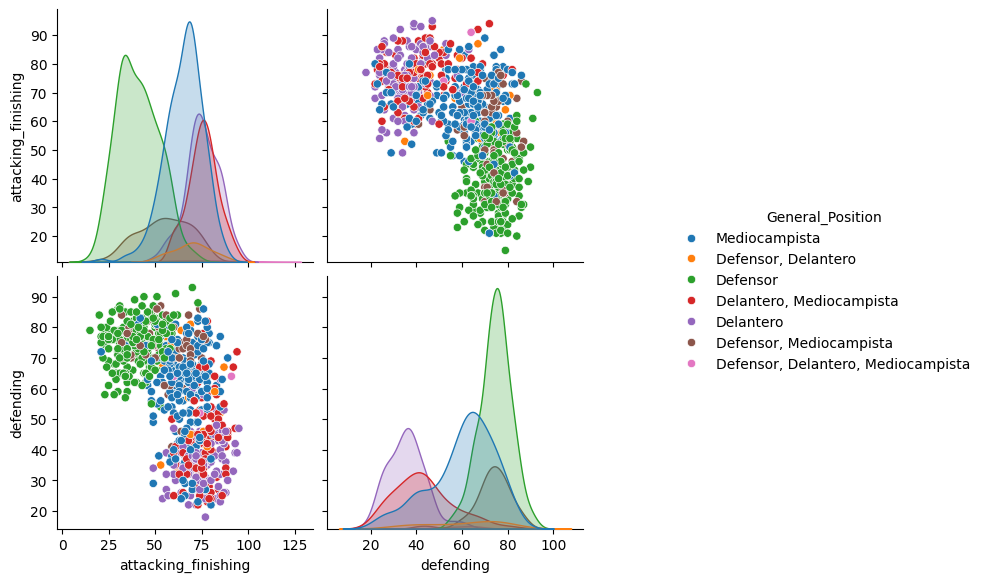

In [ ]:
pairplot_variables(_df_23_no_gk,['attacking_finishing','defending'],figsize=(10, 6),Legend=True)

Excluyendo al arquero, dado que no posee ninguna de dichas habilidades, podemos observar como los defensores están más agrupados en la zona de una buena calificación en defensa pero mala en finalización de jugadas de ataque, los mediocampistas se encuentran en el medio, con buenas cualidades defensivas y un poco mejor en finalización de ataque, y por ultimo, los delanteros son quienes mayor puntuación en tienen en la variable de ataque, como es de esperar.

**2.   Power Jumping vs Defending:** Por lo general, los defensores tienen buenas cualidades de juego aéreo, por ende nos pareció interesante graficar la habilidad de salto vs defensa, esperando encontar a los defensores en los puntos más altos de ambos ejes

<Figure size 1000x600 with 0 Axes>

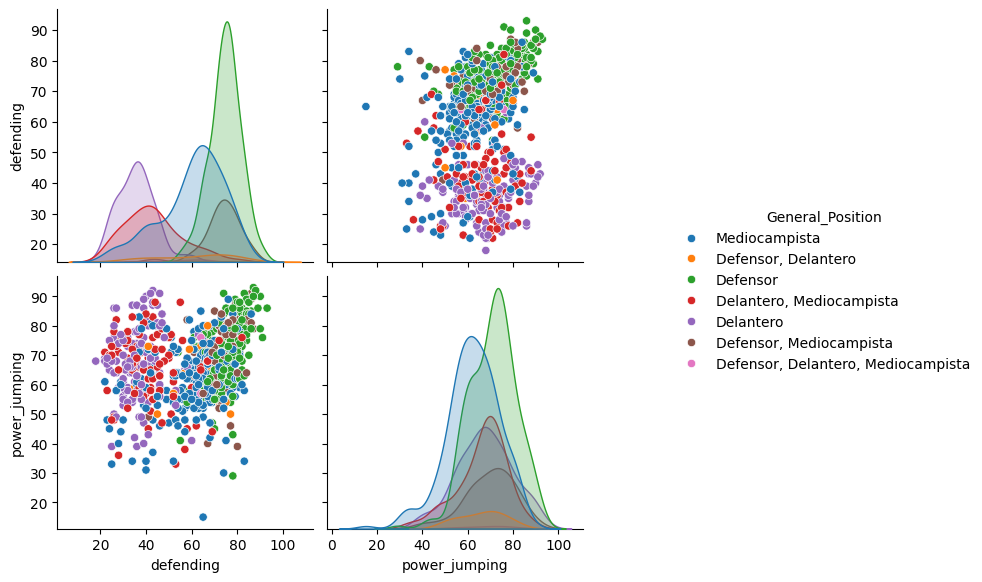

In [ ]:
pairplot_variables(_df_23_no_gk,['defending','power_jumping'],figsize=(10, 6),Legend=True)

Observamos que efectivamente, las defensoras además de precerbar su poder defensivo, son las que mejor capacidad de salto tienen.

**3.   Mentality Vision vs CM:** Al graficar este par de variables, buscamos comprobar de forma visual, que los mejores jugadores del mediocampo que son los que incian las jugadas y distribuyen el juego deben tener una mejor visión y mentalidad de juego.

<Figure size 1000x600 with 0 Axes>

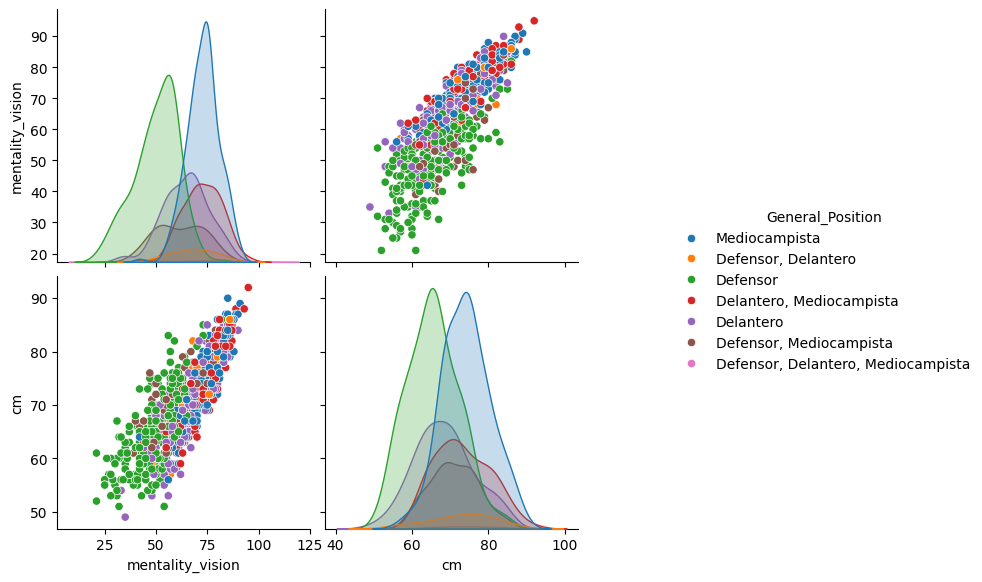

In [ ]:
pairplot_variables(_df_23_no_gk,['mentality_vision','cm'],figsize=(10, 6),Legend=True)

Podemos ver que la relación entre ambas variables es positiva, lo cuál está en linea con lo esperado, a su vez, algo naive, que los mediocampistas son los que mejor puntaje tienen en su posición y mayor mentalidad de juego tienen.

**4.   Dribbling vs Defending_Marking_Awareness**: Al graficar esta combinación, esperamos una buena separación entre aquellos jugadores con buen puntaje de marcado defensivo y aquellos con habilidad de mover la pelota y avanzar en el campo de juego.

<Figure size 1000x600 with 0 Axes>

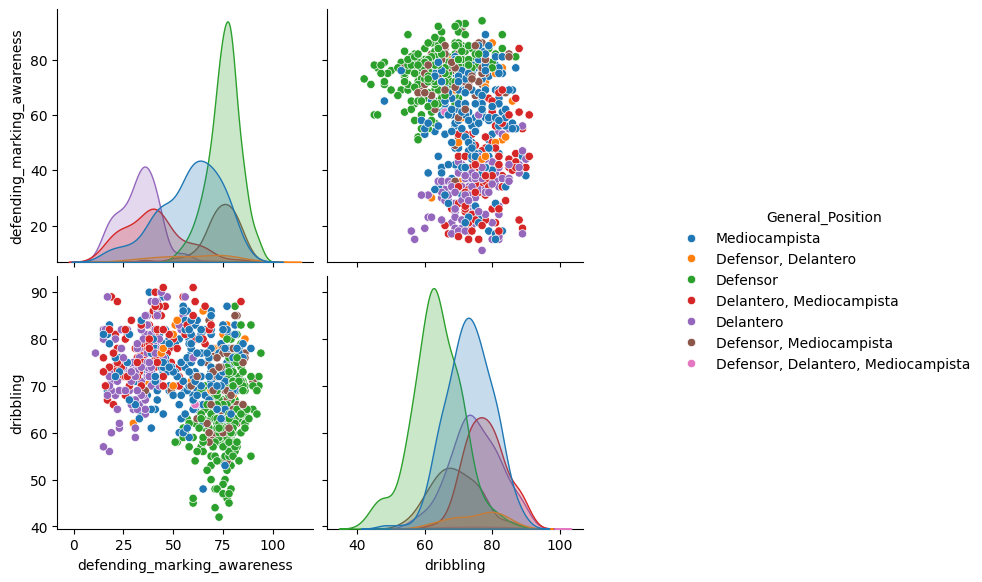

In [ ]:
pairplot_variables(_df_23_no_gk,['defending_marking_awareness','dribbling'],figsize=(10, 6),Legend=True)

Efectivamente, los delanteros y mediocampistas tienen mejores habilidad de manejo de pelota y avance que los defensores que tienen un mejor manejo de la defensa.

##Clustering

Vamos a implementar distintas técnicas de clustering para encontrar jugadoras equivalentes en cuanto a sus aptitudes y habilidades futbolisticas, que permitan a los tomadores de decisión un intercambio acertado en caso de lesión u otro motivo que requiera un cambio.
Dado que lo que buscamos es equivalencia entre jugadoras, vamos a filtrar nuestro dataset con una posición determinada, por ejemplo, jugadoras de mediocampo, y luego encontrar clusters dentro de las jugadoras del mediocampo para buscar equivalencias. No tendría sentido por ejemplo, mezclar mediocampistas con defensoras, ya que nunca realizariamos dicho cambio.

*   **Objetivo análisis:**  buscar jugadoras del mediocampo que sean equivalentes en calidad y habilidad de juego.


###Selección de features

Para aplicar el primer paso del análisis de clustering, vamos a retomar el análisis exploratorio visual pero con un fin más específico. Vamos a tomar las posiciones de **CM**, **CAM**, **CMD**, **RM** y **LM** que son de mediocampo y vamos a analizar la correlación de forma visual vs algunas variables que sospechamos importantes para entrenar el modelo.

In [ ]:
_df_23_mediocampo = _df_23[_df_23['General_Position'].str.contains('Mediocampista')]
print(f'Nos quedamos con un total de {len(_df_23_mediocampo)} observaciones')

Nos quedamos con un total de 401 observaciones


In [ ]:
_df_23_mediocampo.iloc[:,15:50].head()

,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
754,71.0,66.0,59.0,69.0,57.0,61.0,35,72,46,69,56,69,30,52,64,72,70,71,70,69,65,59,52,65,61,64,60,58,70,69,54,59.0,56,64,49
702,69.0,54.0,64.0,72.0,61.0,65.0,35,46,43,78,68,76,41,56,74,75,69,69,62,60,59,59,57,62,67,58,67,59,70,69,61,61.0,63,68,60
654,65.0,48.0,65.0,64.0,71.0,75.0,45,41,74,75,37,63,58,74,69,67,65,65,59,66,62,38,60,67,79,70,77,71,59,62,61,71.0,70,71,69
831,69.0,48.0,55.0,61.0,49.0,50.0,47,49,51,63,39,59,48,48,54,61,68,69,70,52,73,41,58,54,52,51,38,54,52,54,50,51.0,39,58,43
727,74.0,67.0,65.0,69.0,29.0,55.0,61,66,65,71,62,69,53,57,59,72,71,77,66,61,67,65,61,70,47,73,57,23,70,66,57,66.0,17,33,27


In [ ]:
def pairplot_y_vs_all_x(df, y_var, x_vars, figsize=(12, 8), Legend=True):
    hue_parameter = 'General_Position'

    columns = [y_var] + x_vars + [hue_parameter]
    data = df[columns]

    # Creamos los subplots
    num_x_vars = len(x_vars)
    fig, axes = plt.subplots(1, num_x_vars, figsize=figsize, sharey=True)

    # Ploteamos solo la target vs el resto de las variables.
    for i, x_var in enumerate(x_vars):
        sns.scatterplot(data=data, x=x_var, y=y_var, hue=hue_parameter, ax=axes[i])
        if not Legend:
            axes[i].get_legend().remove()

    plt.tight_layout()

    plt.show()

Las variables que vamos a plotear, de las cuáles sospechamos que serán de utilidad son:

**Shooting** (Tiro): Representa la habilidad de un jugador para realizar disparos precisos y potentes al arco. Un valor alto indica que el jugador es eficaz al marcar goles.

**Pace** (Velocidad): Mide la rapidez de un jugador, tanto en sprints cortos
como en carreras largas. Los jugadores con alta velocidad pueden superar a los oponentes en el campo.

**Defending** (Defensa): Indica la capacidad de un jugador para realizar acciones defensivas, como quites y bloqueos, que evitan que los oponentes marquen goles. Es crucial para defensores y mediocampistas defensivos.

**Physic** (Físico): Evalúa la fuerza física de un jugador, incluyendo su capacidad para resistir choques, mantener el equilibrio y soportar el cansancio durante un partido. Los jugadores con buen físico son más difíciles de derribar y pueden mantener un alto rendimiento por más tiempo.

**Mentality Composure **(Calma Mental): Refleja la capacidad de un jugador para mantener la calma y tomar decisiones acertadas bajo presión, especialmente en situaciones críticas del partido.

**Mentality Vision** (Visión de Juego): Representa la habilidad de un jugador para ver y ejecutar pases hacia compañeros en posiciones favorables, incluso en situaciones complicadas. Los jugadores con buena visión pueden abrir el juego y crear oportunidades de gol.

**Mentality Positioning** (Posicionamiento): Mide qué tan bien un jugador se coloca en el campo, tanto ofensiva como defensivamente. Un buen posicionamiento permite estar en el lugar adecuado en el momento justo para interceptar pases o recibir la pelota.

**Mentality Interceptions** (Intercepciones): Evalúa la capacidad de un jugador para anticipar y cortar los pases del equipo contrario. Los jugadores con buenas intercepciones son eficaces en recuperar la pelota.

**Movement Balance** (Equilibrio): Mide la estabilidad de un jugador, es decir, su capacidad para mantener el control de la pelota incluso cuando es empujado o presionado por los oponentes.

**Power Stamina** (Resistencia): Refleja la capacidad de un jugador para mantener un buen nivel de rendimiento durante todo el partido. Los jugadores con alta resistencia pueden seguir rindiendo a gran nivel sin agotarse.

**Power Strength** (Fuerza): Indica la potencia física de un jugador, que se usa para ganar duelos cuerpo a cuerpo, mantener la posesión de la pelota y dominar en situaciones de uno contra uno.

**Skill Dribbling** (Regate): Evalúa la habilidad de un jugador para manejar la pelota y superar a los oponentes en situaciones de uno contra uno. Los buenos regateadores pueden moverse con rapidez y cambiar de dirección sin perder el control de la pelota.

**Skill Ball Control** (Control de pelota): Mide la capacidad de un jugador para recibir y mantener el control de la pelota en diferentes situaciones. Un buen control de pelota permite a los jugadores manejar pases difíciles y prepararse mejor para el siguiente movimiento.

**Skill Long Passing** (Pase Largo): Representa la habilidad de un jugador para realizar pases largos y precisos hacia compañeros que se encuentran lejos en el campo. Es crucial para abrir el juego y cambiar la dirección del ataque rápidamente.



In [ ]:
_features = ['shooting','pace','defending','physic','mentality_composure','mentality_vision','mentality_positioning','mentality_interceptions','movement_balance','power_stamina','power_strength','skill_dribbling','skill_ball_control','skill_long_passing']

In [ ]:
_mediocampistas = ['cam','cm','cdm','rm','lm']

for i in _mediocampistas:
  pairplot_y_vs_all_x(_df_23_mediocampo,f'{i}', _features, figsize=(23, 4), Legend=False)

Por describir algunas relaciones encontradas:

- **Shooting**: Correlación lineal positiva para las posiciones del mediocampo no defensivas.
- **Pace**: Correlación lineal positiva para las posiciones del mediocampo atacante y mediocampistas laterales.
- **Defending**: Fuerte correlación lineal positiva para las posiciones del mediocampo defensivo.
- **Physic**: Correlación lineal positiva para las posiciones del mediocampo central.


Por ende, dado que al menos de forma visual se observa la presencia de correlación lineal e incluso diferente correlación según la posición específica en el mediocampo, utilizaremos dichas variables para la construcción de nuestros cluster.


**1) K-Means**

In [ ]:
_df_clusters = _df_23_mediocampo.copy()

En primer lugar, aplicamos gridsearch, para la búsqueda de los distintos hiperparámetros que maximicen el resultado. Dicho resultado, mediante el método Gridsearch, es la minimización de la Inercia, que no es más que la suma de las distancias cuadradas de cada punto a su centroide más cercano.
En cuanto a los hiperparametros que probamos, los mismos indican lo siguiente:

* n_clusters: cantidad de cluster que esperamos encontrar.
* init: probamos entre dos métodos de iniciación para encontrar los centroides, uno aleatorio y otro inteligente
* n_init: el número de veces que el algoritmo para a probar con centroides diferentes
* max_iter: la cantidad máxima de iteraciones que vamos a comparar
* tol: tolerancia ante cambios en la inercia para declarar la converegencia
* algorithm: algoritmo utilizado para actualizar los centroides
* random_state: control de semillla



In [ ]:
param_grid = {
    'n_clusters': range(2, 4),
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['lloyd', 'full', 'elkan'],
    'random_state': [0, 42, 100]
}

kmeans = KMeans(random_state=42)

grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(_df_23_mediocampo[_features])

print("Mejor combincación de hiperparámetros: ", grid_search.best_params_)
print('Cantidad óptima de clusters: ' + str(grid_search.best_params_['n_clusters']))

Mejor combincación de hiperparámetros:  {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 100, 'n_clusters': 3, 'n_init': 5, 'random_state': 100, 'tol': 0.01}
Cantidad óptima de clusters: 3


Por otro lado, podemos aplicar el método del codo para la búsqueda del número optimo de clusters, cómo método alternativo. El mismo itera, cambiando el número de clusters utilizados y compara la disminución en la inercia respecto a la iteración anterior, eligiendo la cantidad de clusters que maximice dicha variación, lo que genera graficamente la apariencia del "codo".
Por otro lado, lo combinamos con el Silhouette Score que nos da una noción de la cohesión dentro de cada cluster, ya que mide que tan cerca están los puntos entre sí de un mismo cluster y que tan lejos respecto a los cluster restantes.

 Para un K = 2, la media del silhouette score es de : 0.28
 Para un K = 3, la media del silhouette score es de : 0.25
 Para un K = 4, la media del silhouette score es de : 0.2
 Para un K = 5, la media del silhouette score es de : 0.18


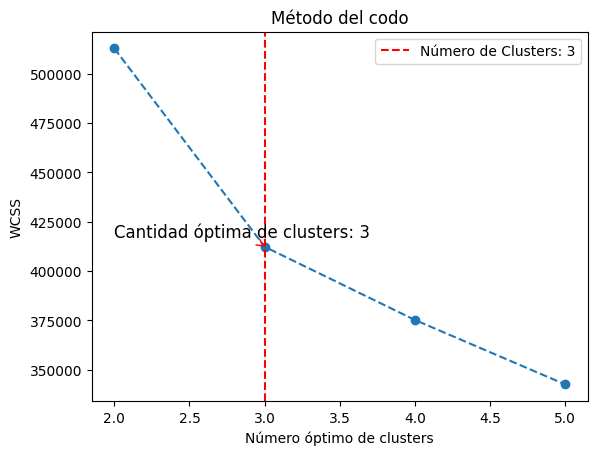

In [ ]:
wcss = []
range_n_clusters = range(2, 6)
for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i,
                init=grid_search.best_params_['init'],
                max_iter=grid_search.best_params_['max_iter'],
                tol=grid_search.best_params_['tol'],
                algorithm=grid_search.best_params_['algorithm'],
                n_init=grid_search.best_params_['n_init'],
                random_state=42
                )
    kmeans.fit(_df_23_mediocampo[_features])
    wcss.append(kmeans.inertia_)

    cluster_labels = kmeans.fit_predict(_df_23_mediocampo[_features])
    silhouette_avg = silhouette_score(_df_23_mediocampo[_features], cluster_labels)

    print(f' Para un K = {i}, la media del silhouette score es de : {round(silhouette_avg, 2)}')

plt.plot(range(2, 6), wcss, marker = 'o', linestyle = '--')
plt.title('Método del codo')
plt.xlabel('Número óptimo de clusters')
plt.ylabel('WCSS')

n_clusters_g = grid_search.best_params_['n_clusters']
plt.axvline(x=n_clusters_g, linestyle='--', color='red', label=f'Número de Clusters: {n_clusters_g}')
plt.annotate(f'Cantidad óptima de clusters: {n_clusters_g}', xy=(n_clusters_g, wcss[n_clusters_g-2]), xytext=(n_clusters_g-1, wcss[n_clusters_g-2]+5000),
            arrowprops=dict(arrowstyle='->',lw=1, color='red'), fontsize=12)
plt.legend()
plt.show()

In [ ]:
# Número de clusters buscado
n_clust = 3

# Ajustamos de acuerdo a nuestro Gridsearch
km = KMeans(n_clusters=n_clust,verbose=True,random_state=42,algorithm=grid_search.best_params_['algorithm'],tol=grid_search.best_params_['tol'],max_iter=grid_search.best_params_['max_iter'],n_init=grid_search.best_params_['n_init'],init=grid_search.best_params_['init'])
km.fit(_df_23_mediocampo[_features])

# Etiquetas asignadas por el algoritmo
clusters = km.labels_
_df_clusters['kmeans_4'] = km.labels_ #clusters

Initialization complete
Iteration 0, inertia 660569.0.
Iteration 1, inertia 475491.66675465234.
Iteration 2, inertia 467013.99731808243.
Iteration 3, inertia 463619.0718350052.
Iteration 4, inertia 462059.0257178441.
Iteration 5, inertia 461160.7264376039.
Iteration 6, inertia 458144.6209617895.
Iteration 7, inertia 447858.59550989186.
Iteration 8, inertia 434983.4824244001.
Iteration 9, inertia 420539.1665563747.
Iteration 10, inertia 415218.3372720727.
Iteration 11, inertia 413158.07122212014.
Iteration 12, inertia 412467.3974794247.
Converged at iteration 12: center shift 1.21603174397339 within tolerance 1.3101140717852684.
Initialization complete
Iteration 0, inertia 658700.0.
Iteration 1, inertia 503069.1567717817.
Iteration 2, inertia 462009.5219635595.
Iteration 3, inertia 426842.5185413962.
Iteration 4, inertia 414331.44292649.
Iteration 5, inertia 412748.12694042764.
Iteration 6, inertia 412373.62016704504.
Converged at iteration 6: center shift 0.5915914511203253 within tole

Ahora, ploteamos dos de las variables elegidas para visualizar los cluster encontrados y anlizar si tienen sentido en nuestro análisis:

In [ ]:
Variable_1 = 'mentality_positioning'
Variable_2 = 'defending'

In [ ]:
kmean_clusters = go.Scatter(x=_df_clusters[Variable_1], y=_df_clusters[Variable_2],
                           mode='markers',
                            text=_df_clusters.apply(lambda row: f"Position: {row['General_Position']}<br>Name: {row['short_name']}", axis=1),
                           marker=dict(
                                size=5,
                                color = clusters.astype(float),
                                colorscale='Portland',
                                showscale=False)
                           )

data=[kmean_clusters]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=Variable_1),
                yaxis=dict(title=Variable_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

**2) GGM**

Cómo segundo método de clustering, vamos a aplicar una mezcla de Gaussianas.

Responsabilidades (Probabilidades de pertenencia):
[[1.63891305e-01 8.08604726e-01 2.75039695e-02]
 [4.24570123e-01 9.68859078e-02 4.78543969e-01]
 [3.01133821e-01 7.07100307e-06 6.98859108e-01]
 ...
 [1.14144749e-12 1.00000000e+00 2.57466829e-22]
 [1.38666305e-05 9.99986133e-01 5.97589280e-11]
 [1.27128069e-16 1.00000000e+00 4.80773026e-16]]
Medias de los clusters:
[[68.07187651 68.55019441 67.77299915 68.05500108 71.41421031 75.39354781
  73.72911244 71.90943445 71.52044391 76.7246552  65.58188851 75.51798261
  77.55991212 75.23070261]
 [70.21867539 75.89375705 43.97482161 62.00004753 69.97199899 71.47140641
  74.77218834 42.74774477 74.62619701 69.40733367 61.98937574 76.07054179
  77.34248945 66.74340151]
 [55.77796996 66.54997507 72.20095085 70.12893219 67.10020168 64.4198475
  58.13368228 73.25779179 70.19676888 72.30014017 69.64960928 66.24289818
  72.79595609 70.6898374 ]]
Covarianzas de los clusters:
[[[ 7.33882420e+01  3.45157578e+01  5.30419432e+00  8.02721340e+00
    5.2021

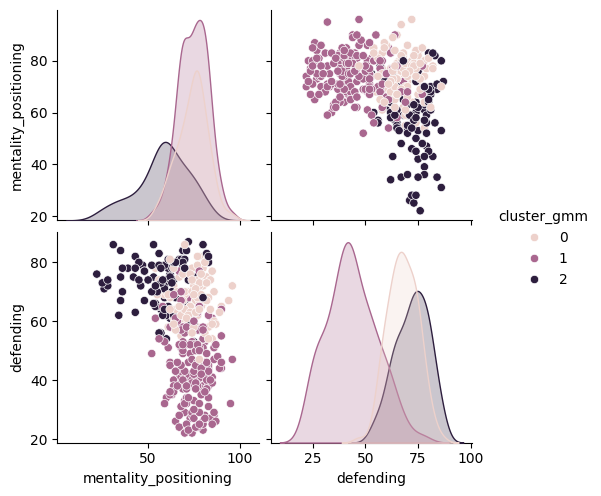

In [ ]:
features = _df_23_mediocampo[_features]

gmm = GaussianMixture(n_components=3, random_state=42)
_df_clusters['cluster_gmm'] = gmm.fit_predict(features)

# Obtener las probabilidades de pertenencia a cada cluster (responsabilidades)
responsibilities = gmm.predict_proba(features)
print(f"Responsabilidades (Probabilidades de pertenencia):\n{responsibilities}")

# Imprimir los parámetros estimados
print(f"Medias de los clusters:\n{gmm.means_}")
print(f"Covarianzas de los clusters:\n{gmm.covariances_}")
print(f"Pesos de los clusters:\n{gmm.weights_}")

# Visualizar los clusters resultantes
sns.pairplot(_df_clusters, hue='cluster_gmm', vars=['mentality_positioning', 'defending'])
plt.show()


In [ ]:
kmean_clusters = go.Scatter(x=_df_clusters[Variable_1], y=_df_clusters[Variable_2],
                           mode='markers',
                            text=_df_clusters.apply(lambda row: f"Position: {row['General_Position']}<br>Name: {row['short_name']}", axis=1),
                           marker=dict(
                                size=5,
                                color = _df_clusters['cluster_gmm'].astype(float),
                                colorscale='Portland',
                                showscale=False)
                           )

data=[kmean_clusters]

layout = go.Layout(title="Clustering GMM",titlefont=dict(size=20),
                xaxis=dict(title=Variable_1),
                yaxis=dict(title=Variable_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

##Análisis de Clustering

Analizando los clustering y haciendo uso de las etiquetas que provienen del dataset indicando la posición de cada jugadora, encontramos que ambas técnicas dan resultados buenos. En particular, se logra una buena separación de las jugadoras del mediocampo-delanteras de las del mediocampo-defensoras. Esto nos sería especialmente útil ante la necesidad de un recambio de jugadoras en esta posición, detectando aquellas que tienen habilidades más parecidas.
Podemos apreciar en el siguiente gráfico las observaciones separadas por posición, lo cuál se asemeja bastante a los cluster encontrados.

In [ ]:
fig = px.scatter(
    _df_clusters,
    x=Variable_1,
    y=Variable_2,
    color='General_Position',
    hover_name='short_name',
    title="Etiquetas de posición",
    labels={
        Variable_1: Variable_1,
        Variable_2: Variable_2,
        'General_Position': 'General Position'
    },
    width=1000,
    height=650
)

fig.show(renderer="colab")


##Embeddings

Para la aplicación de Embeddings, vamos a utilizar el método tsne. En cuanto a los hiperparámetros ajustables, vamos a ajusat el parámetro de perplexity, el número de iteraciones y la tasa de aprendizaje, con el objetivo de encontrar una separación lo más clara posible de forma visual.

Ajustamos el modelo con un parámetro de **perplexity** = 30, **n_iter** = 1000 y una **tasa de aprenzidaje** = 200. Dado que esté método sirve para exploración visual, la evaluación de los resultados implica que tambien sea por apreciación visual, con lo cuál fuimos probando distintos hiperparámetros que arrojasen resultados satisfactorios en la proyección.

In [ ]:
X=_df_23_mediocampo[_features]

In [ ]:
time_start = time.time()

tsne = manifold.TSNE(n_components=2, verbose=1,perplexity=30, n_iter=1000, learning_rate=200)
X_tsne = tsne.fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 401 samples in 0.001s...
[t-SNE] Computed neighbors for 401 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 401 / 401
[t-SNE] Mean sigma: 14.293143
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.635090
[t-SNE] KL divergence after 1000 iterations: 0.783086


In [ ]:
data=[]

graf1 = go.Scatter(x=X_tsne[:,0], y=X_tsne[:,1],
                           mode='markers',
                        text=_df_23_mediocampo.loc[:,'General_Position'],
                           marker=dict(
                                size=5)
                           )

data=[graf1]

layout = go.Layout(title="Visualización de la base en el espacio tsne",titlefont=dict(size=20),
                xaxis=dict(title='componente 1'),
                yaxis=dict(title='componente 2'),
                autosize=False, width=1000,height=700)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [ ]:
positions = _df_23_mediocampo['General_Position'].unique()
colors = px.colors.qualitative.Plotly

color_map = {position: colors[i % len(colors)] for i, position in enumerate(positions)}

color_values = _df_23_mediocampo['General_Position'].map(color_map)


graf1 = go.Scatter(
    x=X_tsne[:, 0], y=X_tsne[:, 1],
    mode='markers',
    text=_df_23_mediocampo['General_Position'],
    marker=dict(
        size=5,
        color=color_values,
        colorscale='Viridis',
    )
)

data = [graf1]

layout = go.Layout(
    title="Visualización de la base en el espacio t-SNE",
    titlefont=dict(size=20),
    xaxis=dict(title='Componente 1'),
    yaxis=dict(title='Componente 2'),
    autosize=False,
    width=1000,
    height=700
)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")


Podemos observar que la separación es bastante buena nuevamente entre mediocampistas-delanteras y mediocampistas-defensoras, no tanto así entre estas posiciones y aquellas de mediocampo puro.